<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-EvelynAylin/blob/main/A01748750_TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresiones (clase), Kmeans y plan semanal
Alumno: Evelyn Aylin Rendon Medina

Matricula: A01748750

Profesora: María de la Paz Rico Fernández

Materia: Ciencia y Analítica de datos

Fecha de entrega: 9 de noviembre 2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

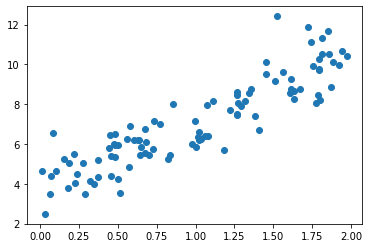

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

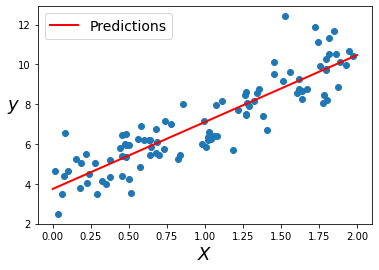

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

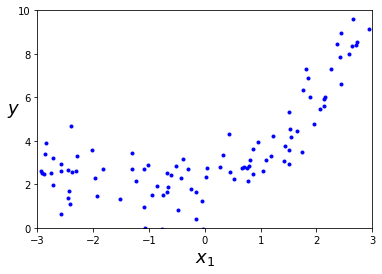

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

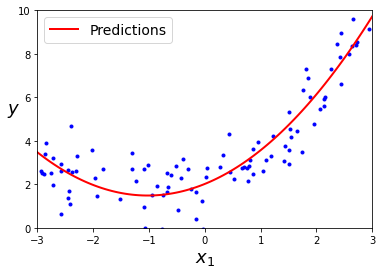

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Funciones

## Gráficas

In [ ]:
#Esta función crea la gráfica para visualizar los modelos creados, su argumento son tres valores, donde:
#modelo debe pasarse entre comillas, ya que es un objeto para añadir título
#yPred=predicción que genera el modelo
#x_Train,y_Train= los datos provenientes de la partición
def graficar(modelo,yPred,x_Train,y_Train):
  #Se establece el tamaño de la figura
  plt.figure(figsize = (8,5))
  #Se realiza un gráfico de dispersión para los datos en x,y
  plt.scatter(x_Train, y_Train, label="Datos")
  #Se gráfica la estimación generada por el modelo
  plt.plot(x_Train, yPred, "r-", linewidth=2, label="Predicciones")
  #Se le coloca título a la gráfica, basado en el objeto modelo
  plt.title(modelo,fontsize=18)
  #Se etiqueta el eje x, y
  plt.xlabel("$X$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  #Se añade una leyenda para identificar la información contenida en la gráfica
  plt.legend(loc="upper left", fontsize=14);

## Errores y R^2

In [ ]:
#Mandamos llamar la librería sklearn con las funciones 
#correspondientes a los errores y R^2
from sklearn import metrics
from sklearn.metrics import r2_score

#Creamos listas para almacenas el error MAE para el conjunto de prueba y entrenamiento,
#tanto para el ejercicio 1, como también para el dos. En este caso, serían 4 listas
#De igual forma se crean listas para R^2, también para el conjunto de entrenamiento 
#y prueba, para ambos ejercicios.
listaMAE_train_E1=[]
listaR_train_E1=[]
listaMAE_train_E2=[]
listaR_train_E2=[]

listaMAE_test_E1=[]
listaR_test_E1=[]
listaMAE_test_E2=[]
listaR_test_E2=[]
#La creación de las listas nos sirve para generar posteriomente sus gráficas

#Se crea la función que calcula a MAE y R^2, cuyos argumentos son:
#yTrain= datos generados de la partición del universo de datos para ese ejercicio
#yHat= estimación generada por el modelo
#ejercicio= correspondiente tal cual al ejercicio '1' o '2'. Esta diferenciación nos ayuda a
#definir en qué lista se debe guardar el resultado para su posterior visualziación
#datos= 'prueba' o 'entrenamiento', pasado como objeto (es decir, entre comillas), lo que
#también nos ayuda a colocar los resultados en la lista correcta
def erroresR2(yTrain,yHat,ejercicio,datos):
  #Se calcula el MAE, basado en Y real, Y estimada. Se redondea a 4 decimales significativos
  print('Error medio Absoluto (MAE):', (metrics.mean_absolute_error(yTrain, yHat)).round(4))
  #Se calcula el RMSE, basado en Y real, Y estimada. Se redondea a 4 decimales significativos
  print('Root Mean Squared Error (RMSE):', (np.sqrt(metrics.mean_squared_error(yTrain, yHat))).round(4))
  #Se calcula R^2, basado en Y real, Y estimada. Se redondea a 4 decimales significativos
  print('R^2_score',r2_score(yTrain, yHat).round(4))
  #Esta sección está formada por una serie de condicionales que nos ayudan a colocar los resultados
  #(en realidad se vuelven a estimar) en la lista adecuada. Esto es necesario para mandar llamar 
  #posteriomente la lista en las gráficas y poder seguir utilizando la función sin crear ninguna
  #variable global. Los errores y R^2 se vuelven a estimar ya que no son computacionalmente muy costosas
  #y guardarlas e indexarlas podría hacer más confuso el código
  #Por tanto, las condiciones son:
  #Si es el ejercicio uno y los datos son de entrenamiento, usa la lista pertinente
  if (ejercicio==1 and datos=='entrenamiento'):
    listaMAE_train_E1.append(metrics.mean_absolute_error(yTrain, yHat))
    listaR_train_E1.append(r2_score(yTrain, yHat))
  #O si es el ejercicio uno y los datos son de prueba, usa la lista pertinente
  elif (ejercicio==1 and datos=='prueba'):
    listaMAE_test_E1.append(metrics.mean_absolute_error(yTrain, yHat))
    listaR_test_E1.append(r2_score(yTrain, yHat))
  #O si es el ejercicio dos y los datos son de entrenamiento, usa la lista pertinente
  elif (ejercicio==2 and datos=='entrenamiento'):
    listaMAE_train_E2.append(metrics.mean_absolute_error(yTrain, yHat))
    listaR_train_E2.append(r2_score(yTrain, yHat))
  #O si es el ejercicio dos y los datos son de prueba, usa la lista pertinente
  elif (ejercicio==2 and datos=='prueba'):
    listaMAE_test_E2.append(metrics.mean_absolute_error(yTrain, yHat))
    listaR_test_E2.append(r2_score(yTrain, yHat))
  #Y si no es ninguna de las opciones anteriores, no es una combinación válida
  else:
    print('Opción inválida')

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
#Este es el código original del notebook, donde se cargan los datos
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [ ]:
#Se indexa a X,y del dataframe
X = df[['Number of Units']]
y = df['Manufacturing Cost']

Se analizan las variables X,y

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

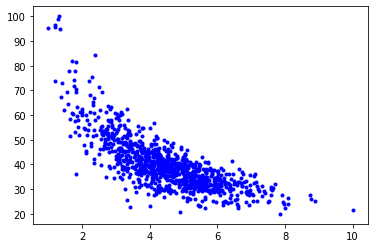

In [ ]:
#Se grafican los datos en color azul, marcador de punto
plt.plot(X,y,'b.')

## División de los datos

In [ ]:
#Importamos la librería para realizar la partición de datos
from sklearn.model_selection import train_test_split
#Se crea la partición, para los datos de prueba y entrenamiento de X,y
xTrain, xTest, yTrain, yTest=train_test_split(X,y, test_size=0.15, random_state=0)

## Regresión Lineal
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### Modelo

In [ ]:
#lineal, conjunto de entrenamiento
#Establecemos el modelo y ajustamos los datos
modeloLineal=LinearRegression(fit_intercept=True)
modeloLineal.fit(xTrain,yTrain)
#Se generan las predicciones
y_predLineal=modeloLineal.predict(xTrain)
#Conjunto de prueba, se generan las predicciones
yHat_ML_test=modeloLineal.predict(xTest)

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',modeloLineal.coef_.round(2), '\nIntersección en Y:',modeloLineal.intercept_.round(2))

Pendiente: [-6.05] 
Intersección en Y: 67.19


Ecuación:

El modelo estima:

$\hat{y} =  + 67.19 -6.05X$

### Visualización

Datos de entrenamiento


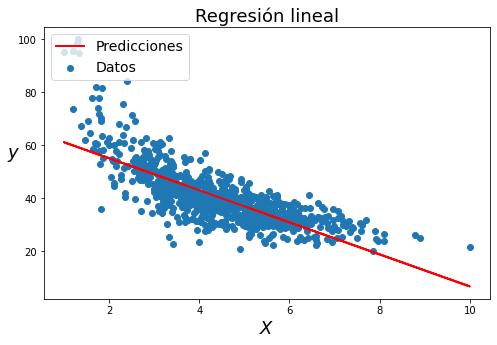

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de entrenamiento')
graficar('Regresión lineal',y_predLineal,xTrain,yTrain)

Datos de prueba


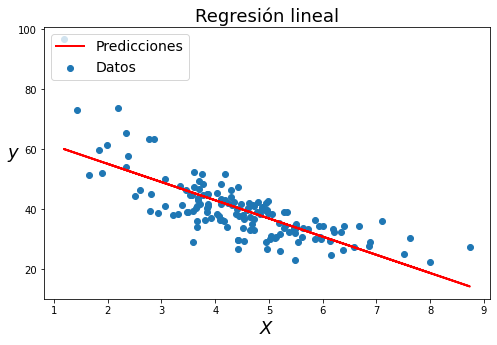

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de prueba')
graficar('Regresión lineal',yHat_ML_test,xTest,yTest)

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión lineal, conjunto de entrenamiento')
erroresR2(yTrain,y_predLineal,1,'entrenamiento')
print("")
print('Regresión lineal, conjunto de prueba')
erroresR2(yTest,yHat_ML_test,1,'prueba')

Regresión lineal, conjunto de entrenamiento
Error medio Absoluto (MAE): 4.9513
Root Mean Squared Error (RMSE): 6.9123
R^2_score 0.5803

Regresión lineal, conjunto de prueba
Error medio Absoluto (MAE): 4.7789
Root Mean Squared Error (RMSE): 6.6374
R^2_score 0.5698


## Regresión Polinomial
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

### Modelo

In [ ]:
#polinomial
#Se crean las características polinomiales de segundo grado para transformar a X
poly_params=PolynomialFeatures(degree=3,include_bias=False)
X_poly=poly_params.fit_transform(xTrain)
#Se genera el modelo con la nueva X (que ahora incluye X original y su cuadrado)
modeloLineal_Poly=LinearRegression(fit_intercept=True)
modeloLineal_Poly.fit(X_poly,yTrain)
#Conjunto de entrenamiento, predicciones
y_predPoly=modeloLineal_Poly.predict(X_poly)
#Conjunto de prueba, predicciones y transformación a X
Xpoly_test=poly_params.fit_transform(xTest)
yHat_MLpoly_test=modeloLineal_Poly.predict(Xpoly_test)

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',modeloLineal_Poly.coef_.round(2), '\nIntersección en Y:',modeloLineal_Poly.intercept_.round(2))

Pendiente: [-33.35   4.87  -0.25] 
Intersección en Y: 111.92


Ecuación:

El modelo estima:

$\hat{y}  = 89.87 - 16.87X + 1.18X^2$



### Visualización

In [ ]:
#Ordenar los valores para que matplotlib no intersecte las líneas
ordenar=np.argsort(xTrain.values.ravel())
sortedX=xTrain.values.ravel()[ordenar]
sortedY=yTrain.values[ordenar]
sorted_Yhat=y_predPoly[ordenar]

Datos de entrenamiento


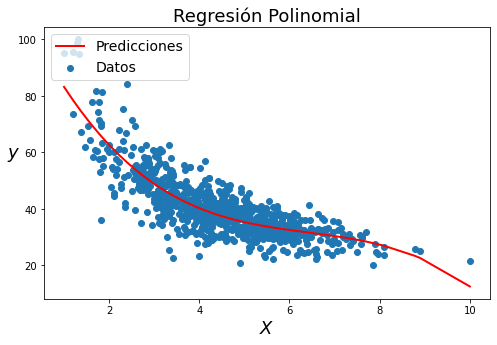

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de entrenamiento')
graficar('Regresión Polinomial',sorted_Yhat,sortedX,sortedY)

In [ ]:
#Se ordenan los datos para que la gráfica se genera de manera correcta
#de los contrario, se tiene una vista traslapada
ordenar=np.argsort(xTest.values.ravel())
TsortedX=xTest.values.ravel()[ordenar]
TsortedY=yTest.values[ordenar]
Tsorted_Yhat=yHat_MLpoly_test[ordenar]

Datos de prueba


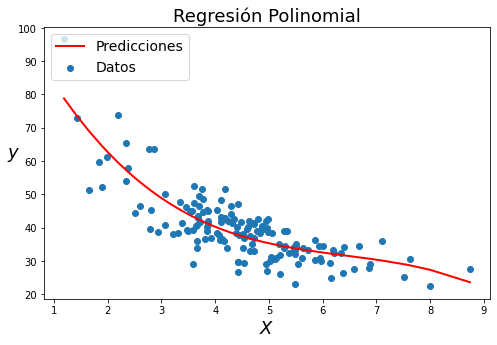

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de prueba')
graficar('Regresión Polinomial',Tsorted_Yhat,TsortedX,TsortedY)

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión polinomial, conjunto de entrenamiento')
erroresR2(yTrain,y_predPoly,1,'entrenamiento')
print("")
print('Regresión polinomial, conjunto de prueba')
erroresR2(yTest,yHat_MLpoly_test,1,'prueba')

Regresión polinomial, conjunto de entrenamiento
Error medio Absoluto (MAE): 4.4791
Root Mean Squared Error (RMSE): 5.9584
R^2_score 0.6881

Regresión polinomial, conjunto de prueba
Error medio Absoluto (MAE): 4.4453
Root Mean Squared Error (RMSE): 5.7107
R^2_score 0.6815


## Regresión con Ridge
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Modelo

In [ ]:
#Conjunto de entrenamiento
#Mandamos llamar la librería correspondiente al modelo Ridge
from sklearn.linear_model import Ridge
#Se selecciona un valor para alpha y solucionador para el modelo
Ridge_Model=Ridge(alpha=5, solver="cholesky")
Ridge_Model.fit(xTrain,yTrain)
y_predRidge=Ridge_Model.predict(xTrain)
#Conjunto de prueba, predicciones
yHat_Ridge_test=Ridge_Model.predict(xTest)

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',Ridge_Model.coef_.round(2), '\nIntersección en Y:',Ridge_Model.intercept_.round(2))

Pendiente: [-6.03] 
Intersección en Y: 67.1


Ecuación

El modelo estima:

$\hat{y} = alpha * (+ 65.63 -5.79X$)^2

donde alpha = 5

### Visualización

Datos de entrenamiento


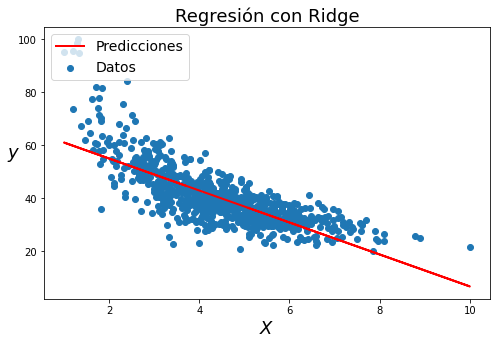

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de entrenamiento')
graficar('Regresión con Ridge',y_predRidge,xTrain,yTrain)

Datos de prueba


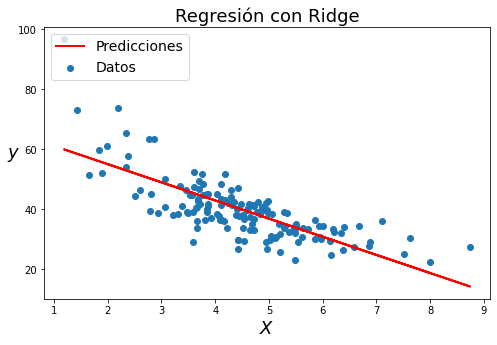

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de prueba')
graficar('Regresión con Ridge',yHat_Ridge_test,xTest,yTest)

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión con Ridge, conjunto de entrenamiento')
erroresR2(yTrain,y_predRidge,1,'entrenamiento')
print("")
print('Regresión con Ridge, conjunto de prueba')
erroresR2(yTest,yHat_Ridge_test,1,'prueba')

Regresión con Ridge, conjunto de entrenamiento
Error medio Absoluto (MAE): 4.9493
Root Mean Squared Error (RMSE): 6.9123
R^2_score 0.5803

Regresión con Ridge, conjunto de prueba
Error medio Absoluto (MAE): 4.7754
Root Mean Squared Error (RMSE): 6.6367
R^2_score 0.5699


## Regresión con Lasso
Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Modelo

In [ ]:
#Conjunto de entrenamiento
#Mandamos llamar la librería correspondiente al modelo Lasso
from sklearn.linear_model import Lasso
#Definimos el modelo con un valor de alpha del cual de hicieron varias pruebas
Lasso_Model=Lasso(alpha=0.5)
Lasso_Model.fit(xTrain, yTrain)
#Geramos las predicciones
y_predLasso=Lasso_Model.predict(xTrain)
#Conjunto de prueba, predicciones
yHat_Lasso_test=Lasso_Model.predict(xTest)

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',Lasso_Model.coef_.round(2), '\nIntersección en Y:',Lasso_Model.intercept_.round(2))

Pendiente: [-5.78] 
Intersección en Y: 65.95


Ecuación

El modelo estima:

$\hat{y} = alpha * abs(+ 65.95 -5.78X$)

donde alpha = 0.5

### Visualización

Datos de entrenamiento


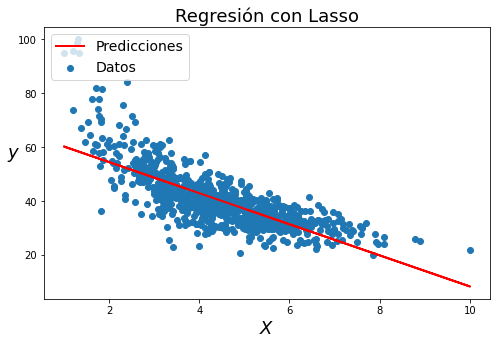

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de entrenamiento')
graficar('Regresión con Lasso',y_predLasso,xTrain,yTrain)

Datos de prueba


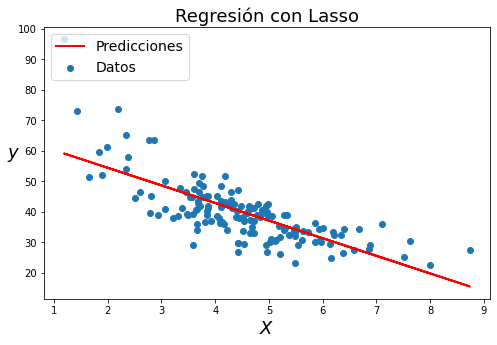

In [ ]:
#Mandamos llamar la función que nos crea la gráfica para los datos y su predicción
print('Datos de prueba')
graficar('Regresión con Lasso',yHat_Lasso_test,xTest,yTest)

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión con Lasso, conjunto de entrenamiento')
erroresR2(yTrain,y_predLasso,1,'entrenamiento')
print("")
print('Regresión con Lasso, conjunto de prueba')
erroresR2(yTest,yHat_Lasso_test,1,'prueba')

Regresión con Lasso, conjunto de entrenamiento
Error medio Absoluto (MAE): 4.9281
Root Mean Squared Error (RMSE): 6.9223
R^2_score 0.5791

Regresión con Lasso, conjunto de prueba
Error medio Absoluto (MAE): 4.7407
Root Mean Squared Error (RMSE): 6.6371
R^2_score 0.5698


## Gráficas
de los cuatro métodos.

### MAE

---------- MAE para cada regresión ----------
Conjunto de entrenamiento
Lineal: 4.9513
Polinomial: 4.4791
Ridge: 4.9493
Lasso: 4.9281


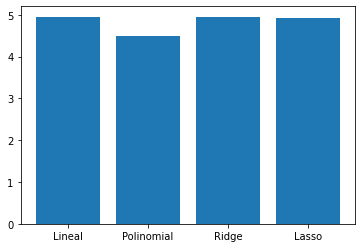

In [ ]:
#Creamos una lista para identificar el nombre de cada modelo
regresiones=['Lineal','Polinomial','Ridge','Lasso']
#Se genera el gráfico de barras con la lista de entrenamiento para el ejercicio 1
plt.bar(regresiones,listaMAE_train_E1)

print('-'*10,'MAE para cada regresión','-'*10)
print('Conjunto de entrenamiento')
#Se imprimen los valores correspodientes (representados en la gráfica)
for i in range(0,4):
  print(regresiones[i]+':',listaMAE_train_E1[i].round(4))

---------- MAE para cada regresión ----------
Conjunto de prueba
Lineal: 4.7789
Polinomial: 4.4453
Ridge: 4.7754
Lasso: 4.7407


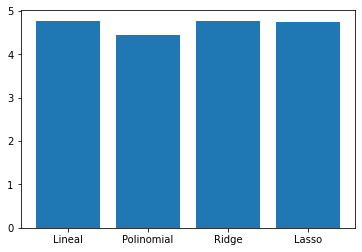

In [ ]:
#Se genera el gráfico de barras con la lista de prueba para el ejercicio 1
plt.bar(regresiones,listaMAE_test_E1)
print('-'*10,'MAE para cada regresión','-'*10)
print('Conjunto de prueba')

for i in range(0,4):
  print(regresiones[i]+':',listaMAE_test_E1[i].round(4))

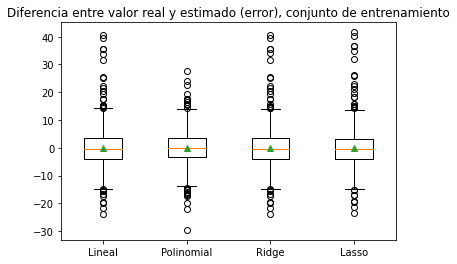

In [ ]:
#Se crea una lista que contiene las estimaciones generadas por todos los modelos
predTrain=[y_predLineal,y_predPoly,y_predRidge,y_predLasso]
#Se genera una lista vacía para ir colocando los errores
erroresTrain=[]
#Se obtiene la diferencia absoluta entre valor real y estimado para cada modelo
#El valor estimado corresponde al conjunto de entrenamiento
for i in range(len(predTrain)):
  error=yTrain-predTrain[i]
  #Se carga el resultado en la lista
  erroresTrain.append(error)

#Se genera el gráfico de cajas y bigotes para los errores
plt.boxplot(erroresTrain, labels=regresiones, showmeans=True)
plt.title('Diferencia entre valor real y estimado (error), conjunto de entrenamiento')
plt.show()

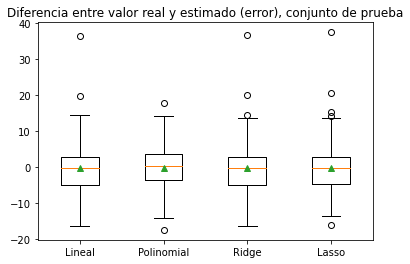

In [ ]:
#Se crea una lista que contiene las estimaciones generadas por todos los modelos
predTest=[yHat_ML_test,yHat_MLpoly_test,yHat_Ridge_test,yHat_Lasso_test]
#Se genera una lista vacía para ir colocando los errores
erroresTest=[]
#Se obtiene la diferencia absoluta entre valor real y estimado para cada modelo
#El valor estimado corresponde al conjunto de entrenamiento
for i in range(len(predTest)):
  error=yTest-predTest[i]
  #Se carga el resultado en la lista
  erroresTest.append(error)

#Se genera el gráfico de cajas y bigotes para los errores
plt.boxplot(erroresTest, labels=regresiones, showmeans=True)
plt.title('Diferencia entre valor real y estimado (error), conjunto de prueba')
plt.show()

### R^2

---------- R^2 para cada regresión ----------
Conjunto de entrenamiento
Lineal: 0.5803
Polinomial: 0.6881
Ridge: 0.5803
Lasso: 0.5791


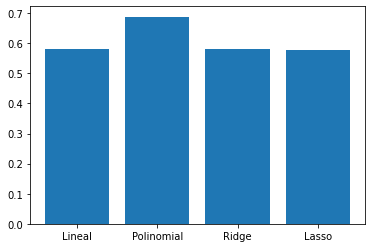

In [ ]:
#Se genera el gráfico de barras con la lista de entrenamiento para el ejercicio 1
plt.bar(regresiones,listaR_train_E1)
print('-'*10,'R^2 para cada regresión','-'*10)
print('Conjunto de entrenamiento')

for i in range(0,4):
  print(regresiones[i]+':',listaR_train_E1[i].round(4))

---------- R^2 para cada regresión ----------
Conjunto de prueba
Lineal: 0.5698
Polinomial: 0.6815
Ridge: 0.5699
Lasso: 0.5698


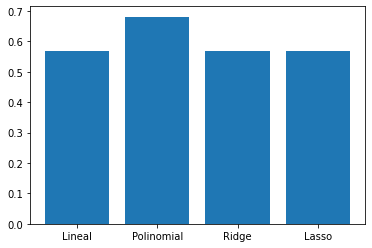

In [ ]:
#Se genera el gráfico de barras con la lista de prueba para el ejercicio 1
plt.bar(regresiones,listaR_test_E1)
print('-'*10,'R^2 para cada regresión','-'*10)
print('Conjunto de prueba')

for i in range(0,4):
  print(regresiones[i]+':',listaR_test_E1[i].round(4))

## Explicación de los resultados

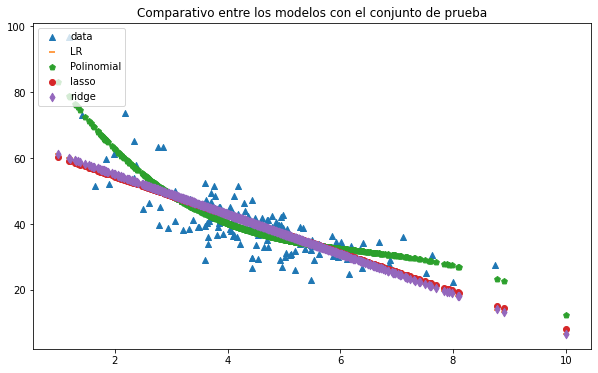

In [ ]:
#Se crea una gráfica que contenga un comparativo entre las estimacioens generadas
#por todos los modelos, de forma que resulte más sencillo determinar sus diferencias
#en contraste con los datos originales. Se emplea solo el conjunto de prueba, que 
#es el que no conoce y en que el rendimiento de los modelos debería ser ligeramente inferior
plt.figure(figsize = (10,6))
plt.title('Comparativo entre los modelos con el conjunto de prueba')
plt.scatter(xTest, np.ravel(yTest), marker='^', label='data')  
plt.scatter(xTrain, np.ravel(y_predLineal), marker='_', label='LR')  
plt.scatter(xTrain, np.ravel(y_predPoly), marker='p', label='Polinomial')  
plt.scatter(xTrain, np.ravel(y_predLasso), marker='o', label='lasso')  
plt.scatter(xTrain, np.ravel(y_predRidge), marker='d', label='ridge')  
plt.legend(loc=2)
plt.show()

Text(0.5, 1.0, 'Conjunto de entrenamiento, predicciones')

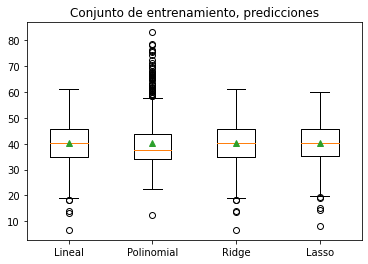

In [ ]:
#También se crean gráficas de cajas y bigotes para entender mejor los resultados
#Este corresponde al conjunto de entrenamiento, en cuanto a sus predicciones
pred_train=[y_predLineal,y_predPoly,y_predRidge,y_predLasso]
plt.boxplot(pred_train, labels=regresiones, showmeans=True)
plt.title('Conjunto de entrenamiento, predicciones')

Text(0.5, 1.0, 'Conjunto de prueba, predicciones')

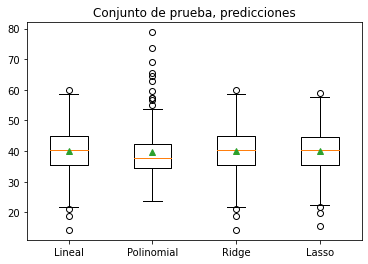

In [ ]:
#Gráfica del conjunto de prueba, en cuanto a sus predicciones
pred_test=[yHat_ML_test,yHat_MLpoly_test,yHat_Ridge_test,yHat_Lasso_test]
plt.boxplot(pred_test, labels=regresiones, showmeans=True)
plt.title('Conjunto de prueba, predicciones')

**¿Qué método conviene más a la empresa?, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación?, ¿qué error tienes?, ¿es bueno?, ¿cómo lo sabes?**
 

Si analizamos el MAE, podemos observar que el error correspondiente con el modelo polinomial es de algunas decimas más pequeño, tanto para el conjunto de entrenamiento, como también el de validación. Si bien entre los otros modelos casi no hay diferencia, tampoco la del modelo polinomial es exagerada, pues no es ni un entero. De todas formas, tener un menor error y al no ser computacionalmente muy costoso, parece que es viable optar por dicho modelo polinomial.
Los errores MAE se encuentran todos dentro del entero 4, casi 5 pero sin alcanzarlo, como puede observarse con más detalle en la creación de sus gráficas o en la sección del cálculo de los errores, donde tal error no resulta muy grande. Por otro lado, en el cálculo del RMSE el modelo polinomial también posee un valor más donde para todos los modelos de van desde 5.7 hasta 6.9. En cuanto a R^2, inicia en 0.56 hasta 0.68 (donde el ajuste perfecto sería un valor de 1), donde el 0.68 corresponde al ajuste del modelo polinomial, por lo que se puede contemplar como un desempeño decente.
Por tanto, los puntajes para el modelo polinomial de tercer grado son considerablemente mejores a los otros analizados y por ello que es el que se contempla como mejor opción. Lo sé debido al análisis de los errores (son números pequeños y ese tiene el menor valor) y el cálculo de R^2, donde se podría decir, tiene un 7 de calificación. Asimismo, puedo afirmar lo anterior porque la visualización del ajuste del modelo nos permite apreciar una buena predicción del comportamiento.
En la partición de los datos, se empleó un 15% para prueba y el restante para entrenamiento.


#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
#Carga de los datos para el segundo ejercicio
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


Se obtiene información del dataframe generado a partir de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

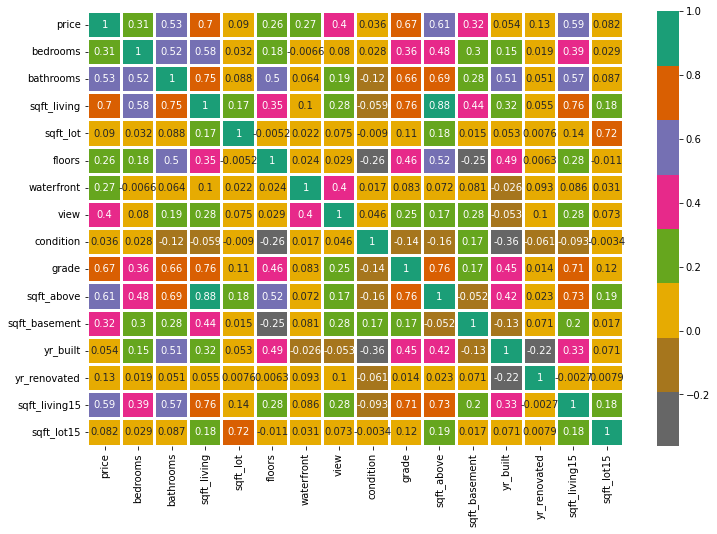

In [ ]:
#Se observa la correlación entre las variables del dataframe
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
#Se obtienen los valores de las columnas en el dataframe
df.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'], dtype=object)

In [ ]:
#Se genera X,y a partir de la indexación del dataframe
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

### División de los datos

In [ ]:
#Se genera la partición del universo de datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## Regresión Lineal

### Modelo

In [ ]:
#tu codigo aquí
#Conjunto de entrenamiento
ML=LinearRegression(fit_intercept=True)
ML.fit(X_train,y_train)
ML_Yhat_E2=ML.predict(X_train)
#Conjunto de prueba, predicciones
ML_Yhat_test_E2=ML.predict(X_test)

X_train, X_test, y_train, y_test

In [ ]:
print('Pendiente:',ML.coef_.round(2), '\nIntersección en Y:',ML.intercept_.round(2))

Pendiente: [[-3.9058850e+04  4.5608460e+04  1.1052000e+02  2.0000000e-02
   2.8236330e+04  5.9837278e+05  4.2149720e+04  1.9661590e+04
   1.1843258e+05  5.2050000e+01  5.8480000e+01 -3.5938700e+03
   1.0480000e+01  2.5860000e+01 -5.8000000e-01]] 
Intersección en Y: [6243189.29]


Ecuación

En clase se comentó que era suficiente con calcular la pendiente e intersección y no darle el formato como en el ejercicio, debido a la gran cantidad de datos

El modelo estima:

$\hat{y} =  Intersección en Y + Pendiente X$

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión lineal, conjunto de entrenamiento')
erroresR2(y_train,ML_Yhat_E2,2,'entrenamiento')
print("")
print('Regresión lineal, conjunto de prueba')
erroresR2(y_test,ML_Yhat_test_E2,2,'prueba')

Regresión lineal, conjunto de entrenamiento
Error medio Absoluto (MAE): 140116.1587
Root Mean Squared Error (RMSE): 217135.9826
R^2_score 0.6553

Regresión lineal, conjunto de prueba
Error medio Absoluto (MAE): 137683.9014
Root Mean Squared Error (RMSE): 205937.5546
R^2_score 0.6356


## Regresión Polinomial

#### Modelo

In [ ]:
#X_train, X_test, y_train, y_test
#Se crean las características polinomiales de segundo grado para transformar a X
PF=PolynomialFeatures(degree=2,include_bias=False)
xPoly=PF.fit_transform(X_train)
#Se genera el modelo con la nueva X (que ahora incluye X original y su cuadrado)
ML_Poly=LinearRegression(fit_intercept=True)
ML_Poly.fit(xPoly,y_train)
#Conjunto de entrenamiento, predicciones
Yhat_ML_Poly_E2=ML_Poly.predict(xPoly)
#Conjunto de prueba, predicciones y tranformación a X
xPoly_test=PF.fit_transform(X_test)
Yhat_ML_Poly_test_E2=ML_Poly.predict(xPoly_test)

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',ML_Poly.coef_.round(2), '\nIntersección en Y:',ML_Poly.intercept_.round(2))

Pendiente: [[ 7.78376130e+05 -9.97413410e+05 -3.99270000e+02 -3.45300000e+01
  -2.14813841e+06 -4.32114029e+06 -1.01716400e+05  4.90046480e+05
   1.19557142e+06 -2.54730000e+02 -2.03480000e+02 -8.51509300e+04
  -3.45890000e+03  3.81714000e+03 -2.94100000e+01  8.52360000e+02
   9.39940000e+02 -1.00300000e+01  0.00000000e+00  1.59383800e+04
   6.42886000e+03 -1.23979000e+03 -3.32002000e+03 -4.23325000e+03
  -6.20000000e-01 -9.04000000e+00 -3.95480000e+02 -1.03600000e+01
   1.40100000e+01  2.30000000e-01 -1.12982000e+04  2.04800000e+01
  -3.10000000e-01 -2.71273700e+04 -1.67820000e+04  1.07606300e+04
  -3.92030000e+02  1.80979300e+04  1.93900000e+01  1.59000000e+00
   4.77390000e+02 -1.89300000e+01 -1.92700000e+01  1.00000000e-02
   9.20000000e-01 -1.12900000e+01 -8.66000000e+00  1.78430000e+02
  -1.07600000e+01  8.10000000e+00  2.17300000e+01  9.50000000e-01
  -7.80000000e-01  1.02000000e+00  1.40000000e-01 -2.26000000e+00
  -1.85900000e+01  0.00000000e+00  5.30000000e-01 -6.00000000e-02

Ecuación

En clase se comentó que era suficiente con calcular la pendiente e intersección y no darle el formato como en el ejercicio, debido a la gran cantidad de datos

El modelo estima:

$\hat{y}  = Intersección Y + Pendiente1X + Pendiente2X^2 + PendientenX^n$


### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión polinomial, conjunto de entrenamiento')
erroresR2(y_train,Yhat_ML_Poly_E2,2,'entrenamiento')
print("")
print('Regresión polinomial, conjunto de prueba')
erroresR2(y_test,Yhat_ML_Poly_test_E2,2,'prueba')

Regresión polinomial, conjunto de entrenamiento
Error medio Absoluto (MAE): 123162.4145
Root Mean Squared Error (RMSE): 183102.5529
R^2_score 0.7549

Regresión polinomial, conjunto de prueba
Error medio Absoluto (MAE): 121682.2727
Root Mean Squared Error (RMSE): 183504.7421
R^2_score 0.7107


## Regresión con Ridge

### Modelo

In [ ]:
#Se selecciona un valor para alpha y solucionador para el modelo
RidgeM=Ridge(alpha=5, solver="cholesky")
RidgeM.fit(X_train,y_train)
#Conjunto de entrenamiento, predicciones
yHat_Ridge_E2=RidgeM.predict(X_train)
#Conjunto de prueba, predicciones
yHat_Ridge_test_E2=RidgeM.predict(X_test)

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',RidgeM.coef_.round(2), '\nIntersección en Y:',RidgeM.intercept_.round(2))

Pendiente: [[-3.9152180e+04  4.5536970e+04  1.1065000e+02  2.0000000e-02
   2.8228520e+04  5.7539937e+05  4.3225440e+04  1.9686570e+04
   1.1830338e+05  5.2220000e+01  5.8430000e+01 -3.5918600e+03
   1.0750000e+01  2.5740000e+01 -5.7000000e-01]] 
Intersección en Y: [6240180.68]


Ecuación

En clase se comentó que era suficiente con calcular la pendiente e intersección y no darle el formato como en el ejercicio, debido a la gran cantidad de datos

El modelo estima:

$\hat{y} = alpha * (+ intersección Y + pendiente X$)^2

donde alpha = 5

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión con Ridge, conjunto de entrenamiento')
erroresR2(y_train,yHat_Ridge_E2,2,'entrenamiento')
print("")
print('Regresión con Ridge, conjunto de prueba')
erroresR2(y_test,yHat_Ridge_test_E2,2,'prueba')

Regresión con Ridge, conjunto de entrenamiento
Error medio Absoluto (MAE): 140125.3572
Root Mean Squared Error (RMSE): 217143.7882
R^2_score 0.6553

Regresión con Ridge, conjunto de prueba
Error medio Absoluto (MAE): 137651.8394
Root Mean Squared Error (RMSE): 205811.6745
R^2_score 0.636


## Regresión con Lasso

### Modelo

In [ ]:
#Se selecciona un valor para alpha en el modelo Lasso
LassoM=Lasso(alpha=0.5)
LassoM.fit(X_train, y_train)
#Conjunto de entrenamiento, predicciones
yHat_Lasso_E2=LassoM.predict(X_train)
#Conjunto de prueba, predicciones
yHat_Lasso_test_E2=LassoM.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.179e+14, tolerance: 2.661e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Ecuación

En clase se comentó que era suficiente con calcular la pendiente e intersección y no darle el formato como en el ejercicio, debido a la gran cantidad de datos

In [ ]:
#Encontramos la pendiente y la intersección
print('Pendiente:',LassoM.coef_.round(2), '\nIntersección en Y:',LassoM.intercept_.round(2))

Pendiente: [-3.9058200e+04  4.5606380e+04  2.9783000e+02  2.0000000e-02
  2.8234050e+04  5.9829875e+05  4.2152530e+04  1.9660210e+04
  1.1843187e+05 -1.3526000e+02 -1.2883000e+02 -3.5938500e+03
  1.0480000e+01  2.5860000e+01 -5.8000000e-01] 
Intersección en Y: [6243151.17]


Ecuación

En clase se comentó que era suficiente con calcular la pendiente a intersección y no darle el formato como en el ejercicio, debido a la gran cantidad de datos

El modelo estima:

$\hat{y} = alpha * abs(intersección Y + pendiente X$)

donde alpha = 0.5

### Errores y R^2

In [ ]:
#Se manda llamar la función que calcula los errores y a R^2
print('Regresión con Lasso, conjunto de entrenamiento')
erroresR2(y_train,yHat_Lasso_E2,2,'entrenamiento')
print("")
print('Regresión con Lasso, conjunto de prueba')
erroresR2(y_test,yHat_Lasso_test_E2,2,'prueba')

Regresión con Lasso, conjunto de entrenamiento
Error medio Absoluto (MAE): 140116.197
Root Mean Squared Error (RMSE): 217135.9827
R^2_score 0.6553

Regresión con Lasso, conjunto de prueba
Error medio Absoluto (MAE): 137683.7872
Root Mean Squared Error (RMSE): 205937.1309
R^2_score 0.6356


## Gráficas

### MAE

---------- MAE para cada regresión ----------
Conjunto de entrenamiento
Lineal: 140116.1587
Polinomial: 123162.4145
Ridge: 140125.3572
Lasso: 140116.197


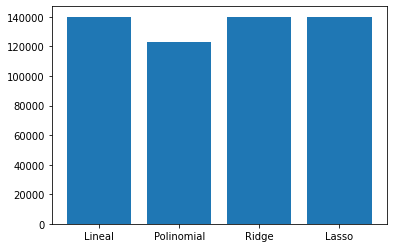

In [ ]:
#Se genera el gráfico de barras con la lista de entrenamiento para el ejercicio 2
plt.bar(regresiones,listaMAE_train_E2)
print('-'*10,'MAE para cada regresión','-'*10)
print('Conjunto de entrenamiento')

for i in range(0,4):
  print(regresiones[i]+':',listaMAE_train_E2[i].round(4))

---------- MAE para cada regresión ----------
Conjunto de prueba
Lineal: 137683.9014
Polinomial: 121682.2727
Ridge: 137651.8394
Lasso: 137683.7872


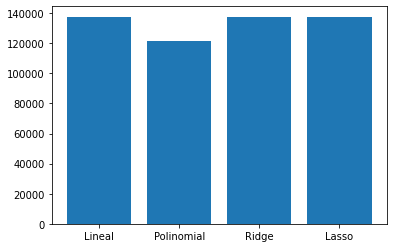

In [ ]:
#Se genera el gráfico de barras con la lista de prueba para el ejercicio 2
plt.bar(regresiones,listaMAE_test_E2)
print('-'*10,'MAE para cada regresión','-'*10)
print('Conjunto de prueba')

for i in range(0,4):
  print(regresiones[i]+':',listaMAE_test_E2[i].round(4))

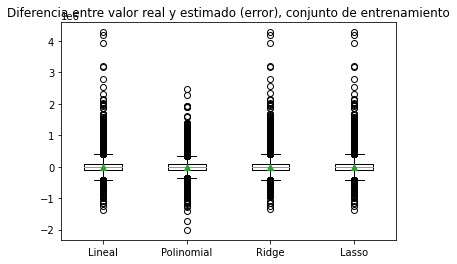

In [ ]:
#Se crea una lista que contiene las estimaciones generadas por todos los modelos
predTrainE2=[ML_Yhat_E2,Yhat_ML_Poly_E2,yHat_Ridge_E2,yHat_Lasso_E2]
#Se genera una lista vacía para ir colocando los errores
erroresTrainE2=[]
#Se obtiene la diferencia absoluta entre valor real y estimado para cada modelo
#El valor estimado corresponde al conjunto de entrenamiento
for i in range(len(predTrainE2)):
  errorE2=y_train-predTrainE2[i].ravel().reshape(19451,1)
  #Se carga el resultado en la lista
  erroresTrainE2.append(errorE2.to_numpy().ravel())

#Se genera el gráfico de cajas y bigotes para los errores
plt.boxplot(erroresTrainE2, labels=regresiones, showmeans=True)
plt.title('Diferencia entre valor real y estimado (error), conjunto de entrenamiento')
plt.show()

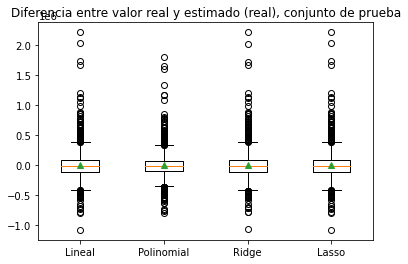

In [ ]:
#Se crea una lista que contiene las estimaciones generadas por todos los modelos
predTestE2=[ML_Yhat_test_E2,Yhat_ML_Poly_test_E2,yHat_Ridge_test_E2,yHat_Lasso_test_E2]
#X_train, X_test, y_train, y_test
#Se genera una lista vacía para ir colocando los errores
erroresTestE2=[]
#Se obtiene la diferencia absoluta entre valor real y estimado para cada modelo
#El valor estimado corresponde al conjunto de entrenamiento
for i in range(len(predTestE2)):
  errorE2_test=y_test-predTestE2[i].ravel().reshape(2162, 1)
  #Se carga el resultado en la lista
  erroresTestE2.append(errorE2_test.to_numpy().ravel())

#Se genera el gráfico de cajas y bigotes para los errores
plt.boxplot(erroresTestE2, labels=regresiones, showmeans=True)
plt.title('Diferencia entre valor real y estimado (real), conjunto de prueba')
plt.show()

### R^2

---------- R^2 para cada regresión ----------
Conjunto de entrenamiento
Lineal: 0.6553
Polinomial: 0.7549
Ridge: 0.6553
Lasso: 0.6553


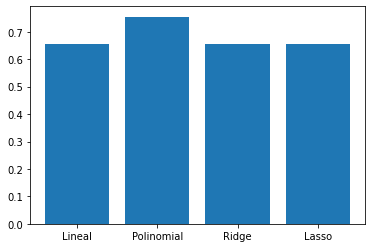

In [ ]:
#Se genera el gráfico de barras con la lista de entrenamiento para el ejercicio 2
plt.bar(regresiones,listaR_train_E2)
print('-'*10,'R^2 para cada regresión','-'*10)
print('Conjunto de entrenamiento')

for i in range(0,4):
  print(regresiones[i]+':',listaR_train_E2[i].round(4))

---------- R^2 para cada regresión ----------
Conjunto de prueba
Lineal: 0.6356
Polinomial: 0.7107
Ridge: 0.636
Lasso: 0.6356


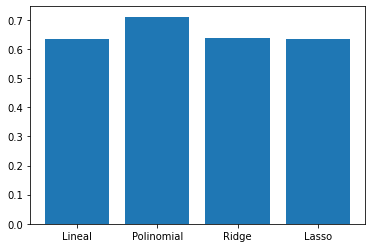

In [ ]:
#Se genera el gráfico de barras con la lista de prueba para el ejercicio 2
plt.bar(regresiones,listaR_test_E2)
print('-'*10,'R^2 para cada regresión','-'*10)
print('Conjunto de prueba')

for i in range(0,4):
  print(regresiones[i]+':',listaR_test_E2[i].round(4))

## Explicación de los resultados

**¿Qué método se aproxima mejor?, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿qué error tienes?, ¿es bueno?, ¿cómo lo sabes?**

De nuevo, el método que se aproxima mejor es el modelo polinomial, en este caso, de segundo grado (puesto que daba un mejor resultado que de tercer grado), debido a que posee un error menor y una R^2 más próxima a uno, que sus contrapartes. Por otro lado, los errores como primera instancia podrían parecer muy grandes, pues el MAE va desde 123162 hasta 140116, el RMSE desde 183102 hasta 217143 y R^2 desde 0.65 hasta 0.75, sin embargo, si contemplamos la escala de los datos originales, observamos que nuestra Y (relativa al precio) tiene un valor mínimo de 7.500000e+04 y máximo de 7.700000e+06, por lo que se puede apreciar que nuestros errores en realidad no son muy grandes. En este caso tal vez convendría realizar un preprocesamiento donde se incluya la normalización o escalado de los datos, lo cual también podría disminuir los valores extremos que se observan en la resta del valor real menos el estimado. Así pues, también me es posible decir que se tiene un buen ajuste o al menos decente para los peores casos, sobre todo si nos basamos en R^2, que es mas intuitiva de interpretar, pues en este caso, contrario al ejercicio anterior, el mejor modelo tendría 7.5 de calificación, por decirlo que una forma que nos resulte más convencional.

# Conclusión

El ejercicio se comenzó en clase, después de haber recibido una explicación pertinente al proceso, lo que me parece una excelente metodología de aprendizaje, pues llevar a la práctica lo revisado es la mejor manera de entender del todo el tema (o lo mejor posible) y aclarar cualquier duda. Así pues, se trabajó en dos ejercicios, donde se generaron estimaciones con distintos modelos, en específico con la regresión lineal, polinomial, Lasso y Ridge. En cuanto al ámbito teórico debemos recordar que el modelo lineal es el más simple de todos, puesto que busca el mejor ajuste para una línea tal cual. Respecto al modelo polinomial, se eleva con determinado grado a la variable independiente, que es la que nos ayuda a estimar la dependiente, que sigue siendo lineal. Por otro lado, en el modelo Ridge se tiene el parámetro Alpha, el cual penaliza de manera equivalente a todos los pesos, de forma que todos pueden tender a cero, pero sin anular alguno de ellos, que es justamente lo contrario con el modelo Lasso, donde solo algunos de los pesos tienden a cero y cuando mayor sea el valor de Alpha, más pesos sufrirán dicha penalización, es decir, el valor impactará más. Aunque lo anterior es el ámbito teórico, la práctica precisamente fue útil para corroborar dichas premisas, pues me resultó posible experimentar, por ejemplo, con los valores de Alpha y verificar cómo impactaban dichos valores más o menos grandes en los pesos o incluso como los grados muy altos del modelo polinomial podían sobreentrenar el modelo; entenderlo es clave para solucionar o proponer modelos, pues son sus cimientos.
En cuanto a la evaluación, fue muy útil conocer cómo calcular los errores a través de las librerías disponibles, al igual que R^2, pues el comparativo de diversas métricas nos puede ayudar a entender mejor cómo se está comportando el modelo. Considerando lo anterior, la visualización gráfica como se ha revisado anteriormente también es un gran elemento de ayuda al buscar comprender mejor el modelo en cuanto a los datos y su ajuste pertinente. De igual forma, explorar y conocer las herramientas disponibles en las librerías es un buen método de optimización.
Por tanto, de forma general puedo decir que se siguió una buena metodología para entender el tema, desde la creación de los modelos, sus bases teóricas, la parte técnica, el análisis que involucra y cómo combinar diversas herramientas para generar un mejor ajuste. 
